# Evaluation

In [1]:
import sys
import os
import importlib

# set your working dir
work_dir = '/home/jqh/Workspace/IBL foundation model/MtM'
os.chdir(work_dir)
print('working dir: ', work_dir)

path = 'src'
sys.path.append(str(path))

from src.utils.eval_utils import load_model_data_local, co_smoothing_eval, compare_R2_scatter, behavior_decoding, draw_threshold_table

working dir:  /home/jqh/Workspace/IBL foundation model/MtM


### 1.Configuration & Load
- The dataset will be split by `datasets.train_test_split(test_size=test_size, seed=seed)`

In [4]:
# Configuration
configs = {
    'model_config': 'src/configs/ndt1.yaml',
    'model_path': 'results/train/num_session_1/model_NDT1/method_ssl/mask_all/stitch_True/model_best.pt',
    'trainer_config': 'src/configs/ssl_session_trainer.yaml',
    'dataset_path': 'data/4b00df29-3769-43be-bb40-128b1cba6d35_aligned', 
    'test_size': 0.15,
    'seed': 42,
}  

In [5]:
# load your model and dataloader
model, accelerator, dataset, dataloader = load_model_data_local(**configs)

seed set to 42
len(dataset): 134


### 2.Co-smoothing (From N-1 to 1) 
- using `co_smoothing_r2` for r2 and psth/residual plots.
- using `co_smoothing_bps` for co-bps stat.

 98%|█████████▊| 43/44 [01:16<00:01,  1.77s/it]


{'per_neuron_mean_bps': 0.349286010775697,
 'per_neuron_std_bps': 0.6458743508256798,
 'per_neuron_mean_r2_psth': 0.029738033124937106,
 'per_neuron_std_r2_psth': 0.07971666591389504,
 'per_neuron_mean_r2_trial': 0.022260341487947057,
 'per_neuron_std_r2_trial': 0.05172089518350244}

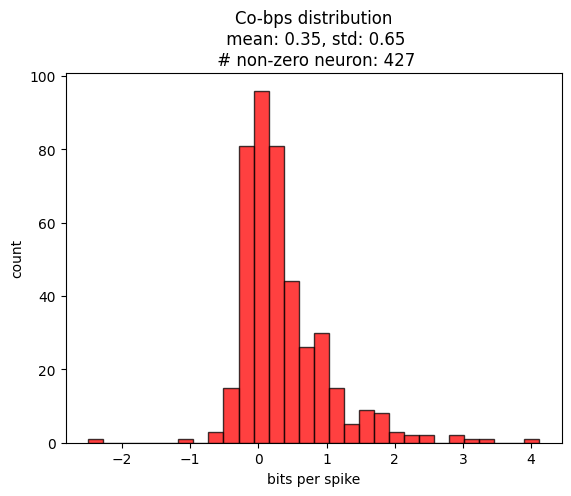

In [8]:
co_smoothing_configs = {
    'subtract': 'task',
    'onset_alignment': [40],
    'method_name': 'test', # used for file name of figures
    'save_path': 'figs/test',
    'mode': 'per_neuron',
    'n_time_steps': 60,    
    'is_aligned': True,
    'target_regions': None,
    'n_jobs': 10
}

co_smoothing_eval(model, accelerator, dataloader, dataset, **co_smoothing_configs)

### 3. Forward Prediction
- using `co_smoothing_r2` with mode `forward-pred` for r2 and psth/residual plots.
- using `co_smoothing_bps` with mode `forward-pred` for co-bps stat.

In [11]:
co_smoothing_configs = {
    'subtract': 'task',
    'onset_alignment': [],
    'method_name': 'test', # used for file name of figures
    'save_path': 'figs/test',
    'mode': 'forward_pred',
    'n_time_steps': 60,    
    'held_out_list': list(range(48, 59)),
    'is_aligned': True,
    'target_regions': None,
    'n_jobs': 10
}

co_smoothing_eval(model, accelerator, dataloader, dataset, **co_smoothing_configs)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


### 4. Inter-Region Prediction
- using `co_smoothing_r2` with mode `inter_region` for r2 and psth/residual plots.
- using `co_smoothing_bps` with mode `inter_region` for co-bps stat.

In [12]:
co_smoothing_configs = {
    'subtract': 'task',
    'onset_alignment': [40],
    'method_name': 'test', # used for file name of figures
    'save_path': 'figs/test',
    'mode': 'inter_region',
    'n_time_steps': 60,    
    'held_out_list': None,
    'is_aligned': True,
    'target_regions': ['all'],
    'n_jobs': 10
}

co_smoothing_eval(model, accelerator, dataloader, dataset, **co_smoothing_configs)

region:   0%|          | 0/7 [00:01<?, ?it/s]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


### 5. Intra-Region Prediction
- using `co_smoothing_r2` with mode `intra_region` for r2 and psth/residual plots.
- using `co_smoothing_bps` with mode `intra_region` for co-bps stat.

In [13]:
co_smoothing_configs = {
    'subtract': 'task',
    'onset_alignment': [40],
    'method_name': 'test', # used for file name of figures
    'save_path': 'figs/test',
    'mode': 'intra_region',
    'n_time_steps': 60,    
    'held_out_list': None,
    'is_aligned': True,
    'target_regions': ['all'],
    'n_jobs': 10
}

co_smoothing_eval(model, accelerator, dataloader, dataset, **co_smoothing_configs)

region:   0%|          | 0/7 [00:01<?, ?it/s]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


### 6. R2 Scatter Plot
- First, run 1 & 2 for each model you want to compare. A `r2.npy` file would be generated in the corresponding figs directory. (the same directory as the `save_path` in 2.)

In [ ]:
compare_r2_configs = {
    'A_path': 'figs/671c_ndt1_nm30_ualg_shuffle_best', # should be the same as the 'save_path' from above
    'B_path': 'figs/671c_ndt1_nm30_alg(-0.4)_shuffle_last',
    'A_name': 'unaligned',    # names for plots
    'B_name': 'aligned'
}    

compare_R2_scatter(**compare_r2_configs)

### 7. Behavior Decoding

In [2]:
# Configuration
configs = {
    'model_config': 'src/configs/ndt1.yaml',
    'model_path': '/home/yizi/IBL_foundation_model/results/method_ssl/mask_neuron/model_best.pt',
    'trainer_config': 'src/configs/trainer_sl_choice.yaml',
    'dataset_path': 'data/671c7ea7-6726-4fbe-adeb-f89c2c8e489b_aligned', 
    'save_path': 'figs/model_NDT1/method_ssl/mask_neuron/choice_decoding',
    'test_size': 0.2,
    'seed': 42,
    'mask_name': 'mask_neuron',
    'metric': 'acc',
    'from_scratch': False,
    'freeze_encoder': False
}  

In [ ]:
# load your model and dataloader
results = behavior_decoding(**configs)

### 8. Threshould Table
- TODO: quality threshold

In [ ]:
from ipywidgets import interact, widgets, fixed

mask_methods = ['']
eval_methods = ['co_smooth', 'forward_pred', 'intra_region', 'inter_region']

firing_rate_threshold = widgets.FloatRangeSlider(
    value=[0.5, 2.5],
    min=0.0,
    max=4.0,
    step=0.01,
    description='FR Ts:',
    orientation='horizontal',
    continuous_update=True
)

quality_threshold = widgets.FloatRangeSlider(
    value=[0.5, 2.5],
    min=0.0,
    max=5.0,
    step=0.1,
    description='Quality Ts:',
    orientation='horizontal',
    continuous_update=False
)

interact(
    draw_threshold_table,
    mask_methods=fixed(mask_methods),
    eval_methods=fixed(eval_methods),
    firing_rate_ts=firing_rate_threshold,
    load_path=fixed('figs'),
    quality_ts=quality_threshold
)